In [ ]:
import pandas as pd
import numpy as np



In [ ]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('/content/drive/MyDrive/movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
ratings_df=pd.read_csv('/content/drive/MyDrive/ratings.csv',
    usecols=['userId', 'movieId', 'rating','timestamp'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.000,964982703
1,1,3,4.000,964981247
2,1,6,4.000,964982224
3,1,47,5.000,964983815
4,1,50,5.000,964982931


In [ ]:
#checkinng for NaN values
movies_df.isnull().sum()

movieId    0
title      0
dtype: int64

In [ ]:
ratings_df.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)


Movies: (9742, 2)
Ratings: (100836, 4)


# Merging the imported Datasets for Analysis

In [80]:
#movies_df.info()
#ratings_df.info()
movies_merged_df=movies_df.merge(ratings_df, on='movieId')
movies_merged_df.head()


,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.000,964982703
1,1,Toy Story (1995),5,4.000,847434962
2,1,Toy Story (1995),7,4.500,1106635946
3,1,Toy Story (1995),15,2.500,1510577970
4,1,Toy Story (1995),17,4.500,1305696483


In [81]:
movies_merged_df=movies_merged_df.dropna(axis = 0, subset = ['title'])
movies_merged_df.head()

,movieId,title,userId,rating,timestamp
0,1,Toy Story (1995),1,4.000,964982703
1,1,Toy Story (1995),5,4.000,847434962
2,1,Toy Story (1995),7,4.500,1106635946
3,1,Toy Story (1995),15,2.500,1510577970
4,1,Toy Story (1995),17,4.500,1305696483


In [ ]:
movies_average_rating=movies_merged_df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Gena the Crocodile (1969),5.000
1,True Stories (1986),5.000
2,Cosmic Scrat-tastrophe (2015),5.000
3,Love and Pigeons (1985),5.000
4,Red Sorghum (Hong gao liang) (1987),5.000


In [ ]:
movies_rating_count=movies_merged_df.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,'71 (2014),1,4.000
1,Latter Days (2003),1,3.500
2,"Late Shift, The (1996)",1,2.500
3,Late Night with Conan O'Brien: The Best of Tri...,1,2.000
4,Late Night Shopping (2001),1,4.500


# Data Visualization

In [ ]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
plt.style.use('dark_background')
%matplotlib inline

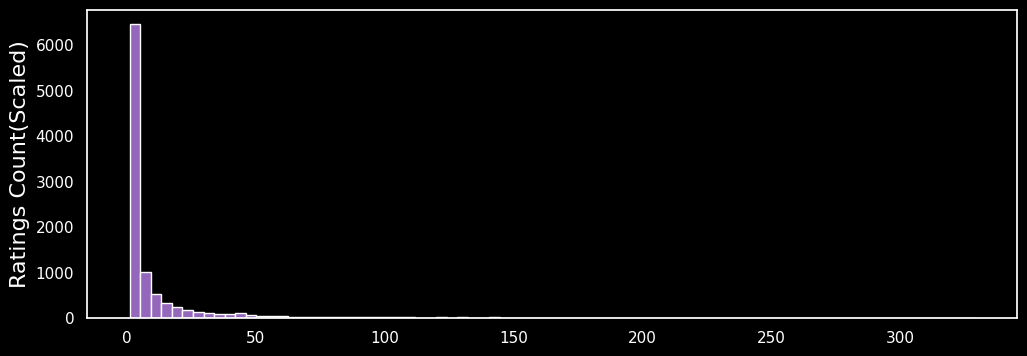

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80,color='tab:purple')
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('ratingcounthist.jpg')

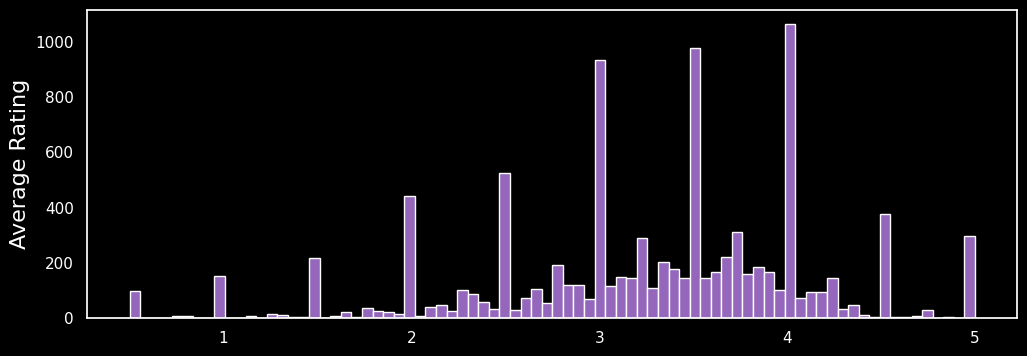

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

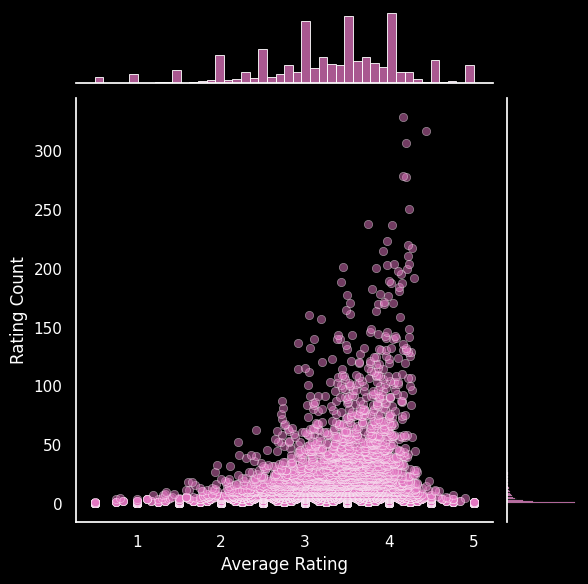

In [ ]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

# Eliminating Outliers

In [ ]:
rating_with_RatingCount = movies_merged_df.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),1,4.000,964982703,215
1,1,Toy Story (1995),5,4.000,847434962,215
2,1,Toy Story (1995),7,4.500,1106635946,215
3,1,Toy Story (1995),15,2.500,1510577970,215
4,1,Toy Story (1995),17,4.500,1305696483,215


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   100836.000
mean        58.759
std         61.965
min          1.000
25%         13.000
50%         39.000
75%         84.000
max        329.000
Name: Rating Count, dtype: float64


In [ ]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,movieId,title,userId,rating,timestamp,Rating Count
0,1,Toy Story (1995),1,4.000,964982703,215
1,1,Toy Story (1995),5,4.000,847434962,215
2,1,Toy Story (1995),7,4.500,1106635946,215
3,1,Toy Story (1995),15,2.500,1510577970,215
4,1,Toy Story (1995),17,4.500,1305696483,215


# Pivotting title as indices & userId as columns

In [ ]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


# Creating kNN Model

In [ ]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movie_features_df.shape

(450, 606)

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

177


In [ ]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Gone in 60 Seconds (2000):

1: Mission: Impossible II (2000), with distance of 0.44375765323638916:
2: Miss Congeniality (2000), with distance of 0.49903422594070435:
3: X-Men (2000), with distance of 0.5010344982147217:
4: Mr. & Mrs. Smith (2005), with distance of 0.5239378213882446:
5: Charlie's Angels (2000), with distance of 0.5277762413024902:
